Load data fromkeras.datasets and perform following computational analysis:- [CO3] (a) Preprocessing of the Data

(b) Divide data into training and testing data set

(c) Build the Gated Recurrent Units (GRU) Model

(d) Training the GRU Model

(e) Text Generation Using the Trained Model

(f) Evaluate Model’s accuracy

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import imdb
vocab_size = 10000
maxlen = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(GRU(128, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=1, batch_size=64, validation_split=0.2)
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 191s 604ms/step - accuracy: 0.6562 - loss: 0.6053 - val_accuracy: 0.8156 - val_loss: 0.4204
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.8130 - loss: 0.4229
Test Loss: 0.4167749285697937
Test Accuracy: 0.8169599771499634


Compare accuracy of Long sort term memory and Gated recurrent Unit models for text generation using data from tensorflow.keras.datasets.

Epoch 1/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 70s 432ms/step - accuracy: 0.6793 - loss: 0.5582 - val_accuracy: 0.8394 - val_loss: 0.3687
Epoch 2/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 398ms/step - accuracy: 0.8926 - loss: 0.2643 - val_accuracy: 0.8476 - val_loss: 0.3512
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 61ms/step - accuracy: 0.8461 - loss: 0.3548
LSTM Model Accuracy: 0.8468
Epoch 1/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 69s 421ms/step - accuracy: 0.6524 - loss: 0.5967 - val_accuracy: 0.8254 - val_loss: 0.3889
Epoch 2/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 435ms/step - accuracy: 0.8848 - loss: 0.2846 - val_accuracy: 0.8460 - val_loss: 0.3614
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.8378 - loss: 0.3658
GRU Model Accuracy: 0.8397


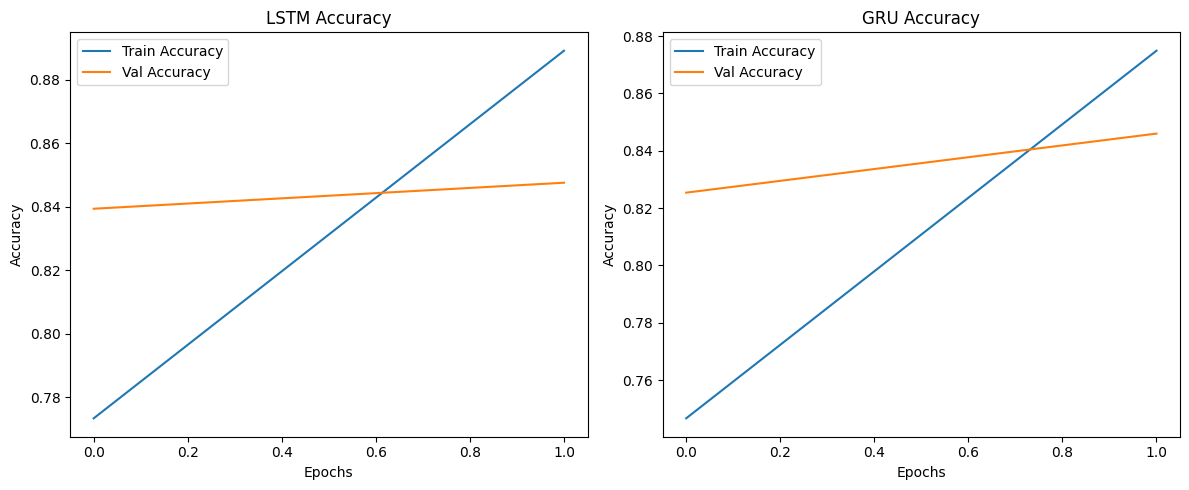

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

max_words = 10000
maxlen = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

def create_lstm_model():
    model = Sequential()
    model.add(Embedding(max_words, 128))
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_gru_model():
    model = Sequential()
    model.add(Embedding(max_words, 128))
    model.add(GRU(128))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(x_train, y_train, epochs=2, batch_size=128, validation_split=0.2)

lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test, y_test)
print(f'LSTM Model Accuracy: {lstm_accuracy:.4f}')

gru_model = create_gru_model()
gru_history = gru_model.fit(x_train, y_train, epochs=2, batch_size=128, validation_split=0.2)

gru_loss, gru_accuracy = gru_model.evaluate(x_test, y_test)
print(f'GRU Model Accuracy: {gru_accuracy:.4f}')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Val Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(gru_history.history['accuracy'], label='Train Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='Val Accuracy')
plt.title('GRU Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()